In [1]:
# importando bibliotecas
import pandas as pd
import pandas as pd
from sklearn.model_selection import train_test_split
#usada para o pré-processamento de daddos, minmax e standard para dimensionar e padronizar e o onehot para codificar variáveis em formato numérico
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
#classificador redes neurais com MLP
from sklearn.neural_network import MLPClassifier
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, f1_score
from sklearn import metrics
import numpy as np

In [2]:
dt = pd.read_csv('/home/geraldo/Documentos/python_projects/iot-ia/sensor_data.csv', low_memory=False)

In [3]:
dt.head()

,lux,humidity,temperature,lighting_switch,climate_switch,door_actuator,lux_status,humidity_status,temperature_status,environment_temperature,environment_lux,label
0,159.024210,75.145465,0.000000,1,0,0,1,0,1,16,450,2
1,155.119111,20.952129,0.000000,1,0,0,1,1,1,30,450,2
2,0.000000,12.465061,0.000000,0,1,0,0,1,1,20,350,0
3,152.576238,7.613451,54.403436,1,0,1,1,0,1,28,450,2
4,47.662035,75.543981,0.000000,1,1,0,1,0,1,29,350,2


In [4]:
dt['label'].value_counts()

label
0    6700888
2    2088118
1     923608
3     287386
Name: count, dtype: int64

In [5]:
normal = dt.loc[dt['label'] == 0]
arcond = dt.loc[dt['label'] == 1]
ilu = dt.loc[dt['label'] == 2]
iluar = dt.loc[dt['label'] == 3]

In [6]:
# Selecionando aleatoriamente aproximadamente 51000 amostras de cada classe para balancear os dados de treinamento

X_train_ilu, X_tst_ilu, y_train_ilu, y_tst_ilu = train_test_split(ilu.drop(['label'],axis=1), ilu['label'], test_size=0.13, shuffle=True)
X_train_arcond, X_tst_arcond, y_train_arcond, y_tst_arcond = train_test_split(arcond.drop(['label'],axis=1), arcond['label'], test_size=0.29, shuffle=True)
X_train_normal, X_tst_normal, y_train_normal, y_tst_normal = train_test_split(normal.drop(['label'],axis=1), normal['label'], test_size=0.038, shuffle=True)

In [7]:
# Transformando array em series pandas novamente
normal_pd_X = pd.DataFrame(X_tst_normal)
normal_pd_y = pd.DataFrame(y_tst_normal)
ilu_pd_X = pd.DataFrame(X_tst_ilu)
ilu_pd_y = pd.DataFrame(y_tst_ilu)
arcond_pd_X = pd.DataFrame(X_tst_arcond)
arcond_pd_y = pd.DataFrame(y_tst_arcond)

normal_pd_X['label'] = normal_pd_y
ilu_pd_X['label'] = ilu_pd_y
arcond_pd_X['label'] = arcond_pd_y

# concatenando as amostras das 4 classes de saída
data = pd.concat([iluar, normal_pd_X, ilu_pd_X, arcond_pd_X])
data['label'].value_counts()

label
3    287386
2    271456
1    267847
0    254634
Name: count, dtype: int64

In [8]:
data.to_csv('meu_arquivo.csv', index=False)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1082030 entries, 74 to 7993093
Data columns (total 12 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   lux                      1082030 non-null  float64
 1   humidity                 1082030 non-null  float64
 2   temperature              1082030 non-null  float64
 3   lighting_switch          1082030 non-null  int64  
 4   climate_switch           1082030 non-null  int64  
 5   door_actuator            1082030 non-null  int64  
 6   lux_status               1082030 non-null  int64  
 7   humidity_status          1082030 non-null  int64  
 8   temperature_status       1082030 non-null  int64  
 9   environment_temperature  1082030 non-null  int64  
 10  environment_lux          1082030 non-null  int64  
 11  label                    1082030 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 107.3 MB


In [9]:
# Número de features
inputs = len(data.columns)-1
print(inputs)

11


In [10]:
# Modelo de MLP para classificação criado
mlp_clf = MLPClassifier(hidden_layer_sizes=(inputs,32,16,4),
                        max_iter = 100,activation = 'logistic',
                        solver = 'adam',learning_rate = 'adaptive',
                        learning_rate_init = 0.007, early_stopping = True,
                        verbose=True)

In [11]:
# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(data.drop(['label'],axis=1), data['label'], test_size=0.1, shuffle=True)

In [12]:
full_pipe = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler()),
    ('mlp', mlp_clf)
])

In [13]:
# Realizando o treinamento
full_pipe.fit(X_train,y_train)

Iteration 1, loss = 0.46435541
Validation score: 0.773030
Iteration 2, loss = 0.38552231
Validation score: 0.776871
Iteration 3, loss = 0.13958550
Validation score: 0.986794
Iteration 4, loss = 0.06604654
Validation score: 0.986620
Iteration 5, loss = 0.06376621
Validation score: 0.988170
Iteration 6, loss = 0.06299616
Validation score: 0.984474
Iteration 7, loss = 0.06232462
Validation score: 0.987903
Iteration 8, loss = 0.06170119
Validation score: 0.987400
Iteration 9, loss = 0.04530414
Validation score: 0.988951
Iteration 10, loss = 0.03802923
Validation score: 0.990522
Iteration 11, loss = 0.03543409
Validation score: 0.992288
Iteration 12, loss = 0.03399351
Validation score: 0.992873
Iteration 13, loss = 0.03156146
Validation score: 0.993716
Iteration 14, loss = 0.03199039
Validation score: 0.991641
Iteration 15, loss = 0.02993072
Validation score: 0.991795
Iteration 16, loss = 0.02970628
Validation score: 0.994896
Iteration 17, loss = 0.02849889
Validation score: 0.994907
Iterat

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('mlp',
                 MLPClassifier(activation='logistic', early_stopping=True,
                               hidden_layer_sizes=(11, 32, 16, 4),
                               learning_rate='adaptive',
                               learning_rate_init=0.007, max_iter=100,
                               verbose=True))])

In [14]:
# Usando preditor para os dados de treino
y_train_pred = full_pipe.predict(X_train)
print(y_train_pred)

[3 3 0 ... 2 1 3]


In [15]:
y_train_score = full_pipe.score(X_train, y_train)
print(y_train_score)

0.9962354709820122


In [16]:
# Usando o preditor nos dados de teste
y_test_pred = full_pipe.predict(X_test)
print(y_test_pred)

[3 0 2 ... 1 1 3]


In [17]:
# Observando a acurácia do modelo nos dados de teste
y_test_score = full_pipe.score(X_test, y_test)
print(y_test_score)

0.9961738583957931


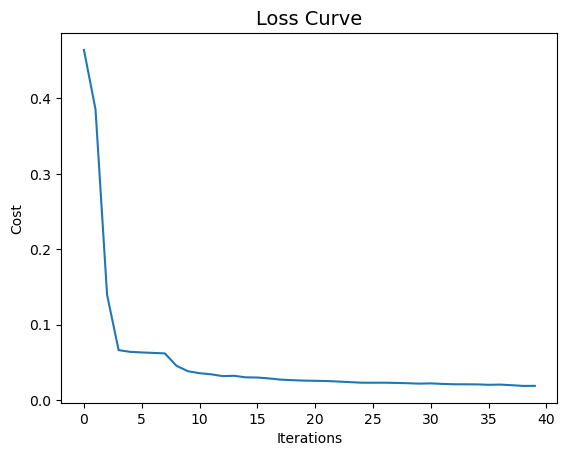

In [18]:
# Curva de perdas do melhor modelo
plt.plot(mlp_clf.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [19]:
print(
    f"Classification report for classifier {mlp_clf}:\n"
    f"{metrics.classification_report(y_test, y_test_pred)}\n"
)

Classification report for classifier MLPClassifier(activation='logistic', early_stopping=True,
              hidden_layer_sizes=(11, 32, 16, 4), learning_rate='adaptive',
              learning_rate_init=0.007, max_iter=100, verbose=True):
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     25485
           1       0.99      1.00      1.00     27002
           2       1.00      0.99      1.00     26923
           3       0.99      1.00      1.00     28793

    accuracy                           1.00    108203
   macro avg       1.00      1.00      1.00    108203
weighted avg       1.00      1.00      1.00    108203




Matriz de confusão:
[[25319   141    25     0]
 [    4 26988     0    10]
 [   14     0 26714   195]
 [    0    25     0 28768]]


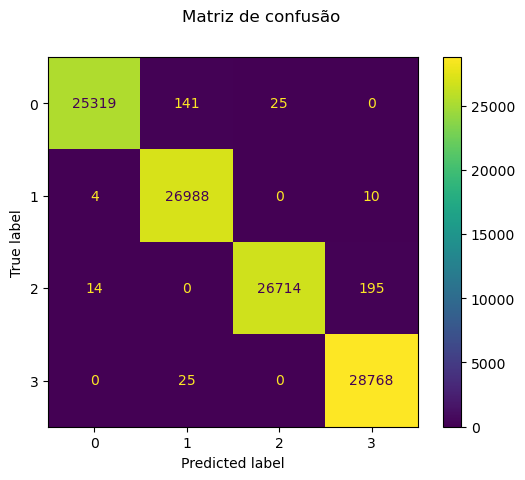

In [20]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
disp.figure_.suptitle("Matriz de confusão")
print(f"Matriz de confusão:\n{disp.confusion_matrix}")

plt.show()

In [51]:
import joblib

joblib.dump(full_pipe, '/home/geraldo/Documentos/python_projects/iot-ia/mlp_smart_enviroument.joblib')

['/home/geraldo/Documentos/python_projects/iot-ia/mlp_smart_enviroument.joblib']

In [52]:
m = joblib.load('/home/geraldo/Documentos/python_projects/iot-ia/mlp_smart_enviroument.joblib')

In [50]:
# lux | humidity | temperature | ligthing_switch | climate_switch | door_actuator | lux_status | humidity_status
# temperature_status | enviroument_temperature | enviroument_lux
# testando dados
features = [286, 50, 30, 1, 1, 1, 1, 1, 1, 25, 300]

# convertendo para array
features_array = np.array([features])

# Prevendo a saída
prediction = m.predict(features_array)

# Mostrando o resultado
print(prediction)


[1]


/home/geraldo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [24]:
data['label'].value_counts()

label
3    288106
2    271391
1    267916
0    254617
Name: count, dtype: int64

In [25]:
data.shape

(1082030, 12)

In [26]:
dt.shape

(10000000, 12)